In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/magisterka

/content/drive/My Drive/magisterka


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from enum import Enum, auto
import json

import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from scripts.data_processing.market_data_processing import prepare_market_data_for_model, add_sentiment_features_from_articles
from model_training.price_model_training import train_price_prediction_model, ModelType, LossFunction
from model_training.price_model_validation import *
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
np.random.seed(120)
random.seed(120)

In [5]:
base_path = '/content/drive/My Drive/magisterka/data/market_data'

In [6]:
X, y = prepare_market_data_for_model("sol_merged.csv", base_path, horizon=12*12)

In [7]:
texts = pd.read_csv("/content/drive/My Drive/magisterka/data/results/articles_labeled.csv")

In [8]:
X = add_sentiment_features_from_articles(X, texts, windows_hours=(2, 6, 12, 24))

In [9]:
X

price_over_ema4h  price_over_ema2h  volatility_4h  \
timestamp                                                                      
2025-04-12 00:10:00+00:00          0.002426          0.002255       0.001855   
2025-04-12 00:15:00+00:00          0.005982          0.005579       0.001930   
2025-04-12 00:20:00+00:00         -0.000058         -0.000425       0.002125   
2025-04-12 00:25:00+00:00          0.001162          0.000777       0.002125   
2025-04-12 00:30:00+00:00          0.004083          0.003560       0.002095   
...                                     ...               ...            ...   
2025-06-06 11:35:00+00:00          0.004034          0.001942       0.000988   
2025-06-06 11:40:00+00:00          0.004583          0.002471       0.000925   
2025-06-06 11:45:00+00:00          0.006682          0.004461       0.000964   
2025-06-06 11:50:00+00:00          0.007233          0.004893       0.000964   
2025-06-06 11:55:00+00:00          0.006684          0.004259       0.000963   

                           volatility_wh  volume_z       s_t  log_return_t-1  \
timestamp                                                                      
2025-04-12 00:10:00+00:00       0.002383 -0.284540  0.002383        0.003796   
2025-04-12 00:15:00+00:00       0.002385  0.917329  0.002385       -0.006025   
2025-04-12 00:20:00+00:00       0.002410 -0.058480  0.002410        0.001269   
2025-04-12 00:25:00+00:00       0.002411 -0.298311  0.002411        0.003087   
2025-04-12 00:30:00+00:00       0.002417 -0.228675  0.002417        0.000877   
...                                  ...       ...       ...             ...   
2025-06-06 11:35:00+00:00       0.002334 -0.278739  0.002334        0.000742   
2025-06-06 11:40:00+00:00       0.002334 -0.245202  0.002334        0.002372   
2025-06-06 11:45:00+00:00       0.002338 -0.180310  0.002338        0.000855   
2025-06-06 11:50:00+00:00       0.002339 -0.086496  0.002339       -0.000261   
2025-06-06 11:55:00+00:00       0.002337 -0.358952  0.002337       -0.000193   

                           news_any  sentiment_mean_2h  news_count_2h  \
timestamp                                                               
2025-04-12 00:10:00+00:00       0.0                0.0            0.0   
2025-04-12 00:15:00+00:00       0.0                0.0            0.0   
2025-04-12 00:20:00+00:00       0.0                0.0            0.0   
2025-04-12 00:25:00+00:00       0.0                0.0            0.0   
2025-04-12 00:30:00+00:00       0.0                0.0            0.0   
...                             ...                ...            ...   
2025-06-06 11:35:00+00:00       0.0                0.0            0.0   
2025-06-06 11:40:00+00:00       0.0                0.0            0.0   
2025-06-06 11:45:00+00:00       0.0                0.0            0.0   
2025-06-06 11:50:00+00:00       0.0                0.0            0.0   
2025-06-06 11:55:00+00:00       0.0                0.0            0.0   

                           has_news_2h  sentiment_mean_6h  news_count_6h  \
timestamp                                                                  
2025-04-12 00:10:00+00:00          0.0                0.0            0.0   
2025-04-12 00:15:00+00:00          0.0                0.0            0.0   
2025-04-12 00:20:00+00:00          0.0                0.0            0.0   
2025-04-12 00:25:00+00:00          0.0                0.0            0.0   
2025-04-12 00:30:00+00:00          0.0                0.0            0.0   
...                                ...                ...            ...   
2025-06-06 11:35:00+00:00          0.0                0.0            0.0   
2025-06-06 11:40:00+00:00          0.0                0.0            0.0   
2025-06-06 11:45:00+00:00          0.0                0.0            0.0   
2025-06-06 11:50:00+00:00          0.0                0.0            0.0   
2025-06-06 11:55:00+00:00          0.0                0.0            0.0   

      

In [10]:
split = TimeSeriesSplit(n_splits=5)

# LSTM - trenowanie

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.7802 - val_loss: 0.4719 - learning_rate: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6088 - val_loss: 0.4938 - learning_rate: 0.0010
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5777 - val_loss: 0.4814 - learning_rate: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5736 - val_loss: 0.4910 - learning_rate: 5.0000e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.5639 - val_loss: 0.5053 - learning_rate: 5.0000e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5550 - val_loss: 0.5133 - learning_rate: 2.5000e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.5447 - val_loss: 0.5170 - learning_rate: 2.5000e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5411 - val_loss: 0.5182 - learning_rate: 1.2500e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.5337 - val_loss: 0.5249 - learning_rat

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


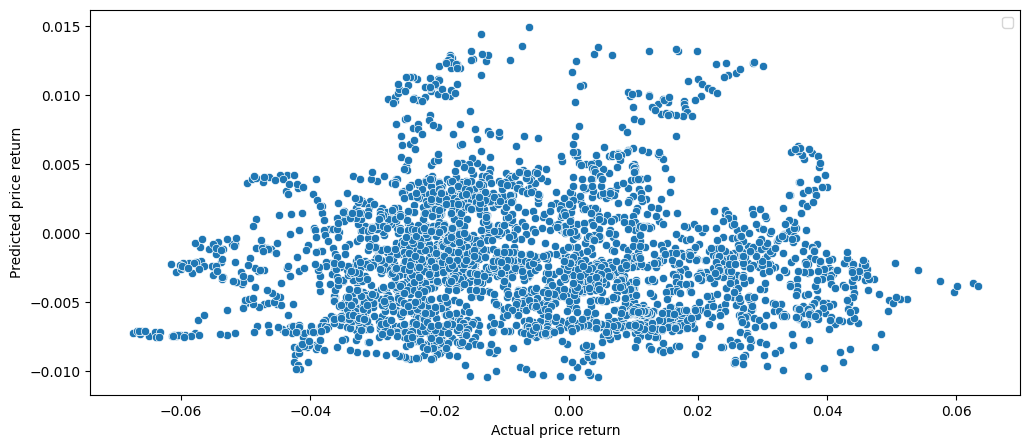

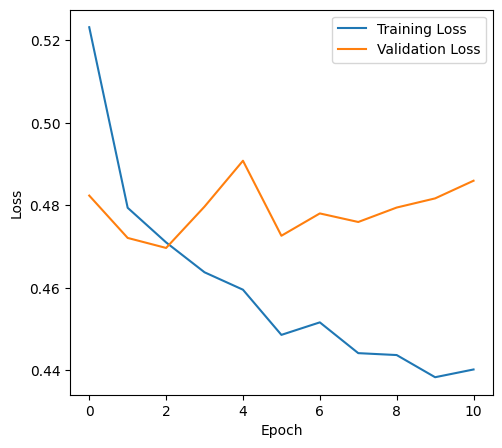

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0006542127812281251
mean CV MAE: 0.020578911527991295
mean CV DA: 0.4830754352030947
mean CV SR: -0.03431549895759971
mean CV R^2: -0.2628801345825195
mean CV Pearson correlation: -0.04201221466064453


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


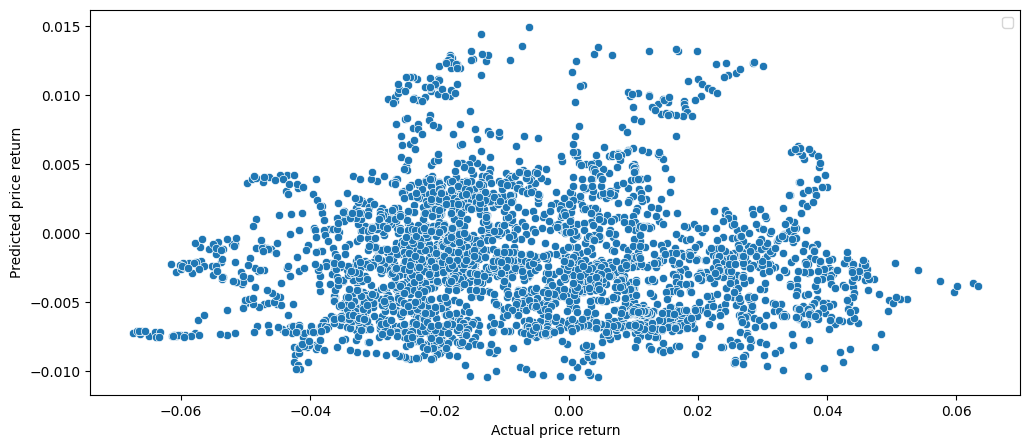

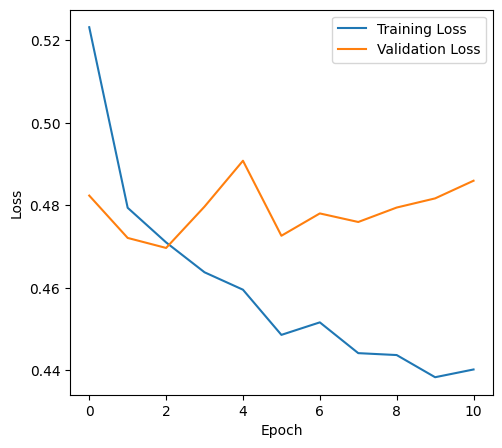

successfully saved training's output to lstm_sol_scores_final_1_1.json


In [ ]:
lstm_1_scores, lstm_1_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_sol_scores_final_1_1.json", dropout=0.5, num_neurons=32, batch_size=128, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.7202 - val_loss: 0.4002 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6328 - val_loss: 0.4414 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5631 - val_loss: 0.4373 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5539 - val_loss: 0.4656 - learning_rate: 5.0000e-04
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5280 - val_loss: 0.4709 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5073 - val_loss: 0.4811 - learning_rate: 2.5000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5051 - val_loss: 0.4869 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5004 - val_loss: 0.4873 - learning_rate: 1.2500e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4811 - val_loss: 0.4871 - learning_rat

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


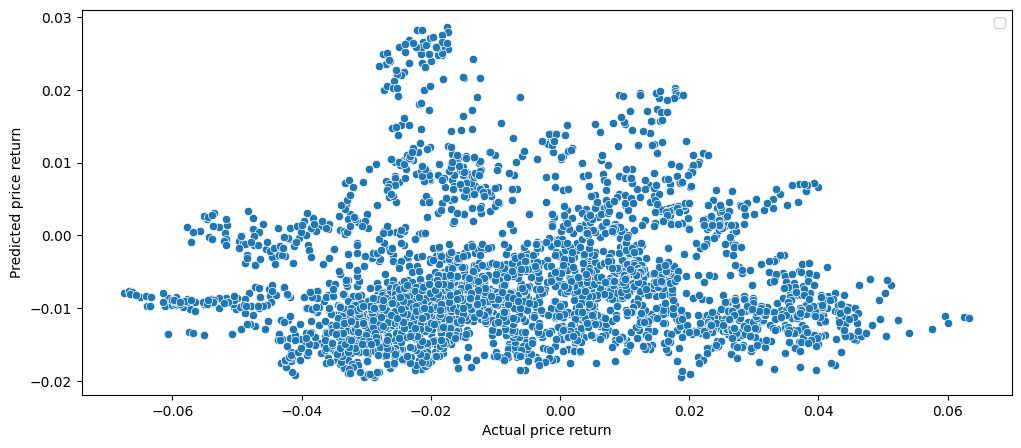

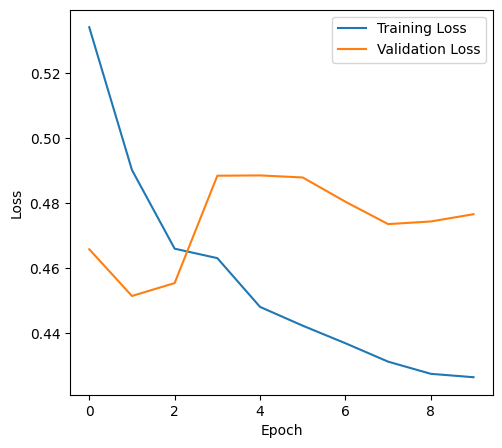

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0006684224354103208
mean CV MAE: 0.021106284111738205
mean CV DA: 0.4847195357833655
mean CV SR: 0.01497204811766387
mean CV R^2: -0.32292022705078127
mean CV Pearson correlation: 0.06165553256869316


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


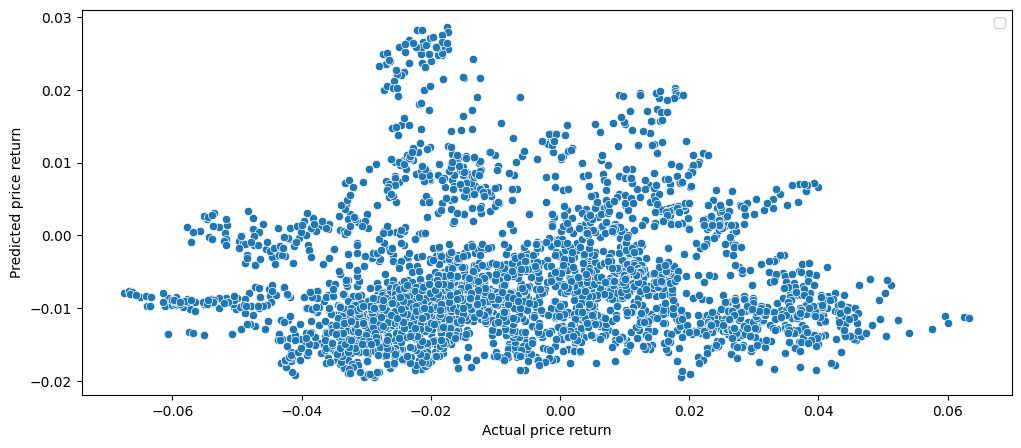

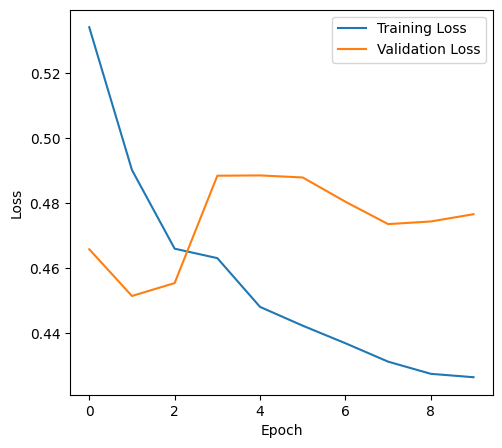

successfully saved training's output to lstm_sol_scores_final_2_1.json


In [ ]:
lstm_2_scores, lstm_2_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_sol_scores_final_2_1.json", dropout=0.5, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.8591 - val_loss: 0.4556 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.6794 - val_loss: 0.4554 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6337 - val_loss: 0.4272 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5887 - val_loss: 0.4659 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5929 - val_loss: 0.4125 - learning_rate: 0.0020
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5740 - val_loss: 0.4181 - learning_rate: 0.0020
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5647 - val_loss: 0.4404 - learning_rate: 0.0020
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5405 - val_loss: 0.4497 - learning_rate: 0.0010
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5193 - val_loss: 0.4438 - learning_rate: 0.0010
Epoch 10/1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


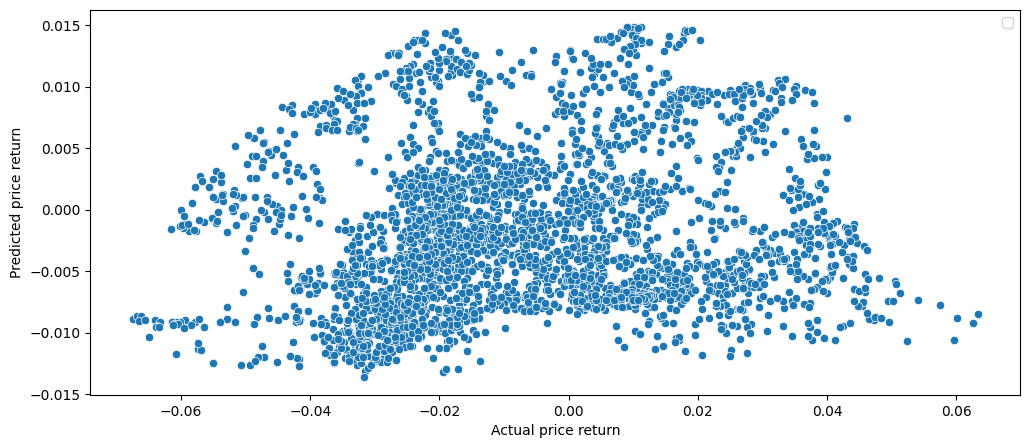

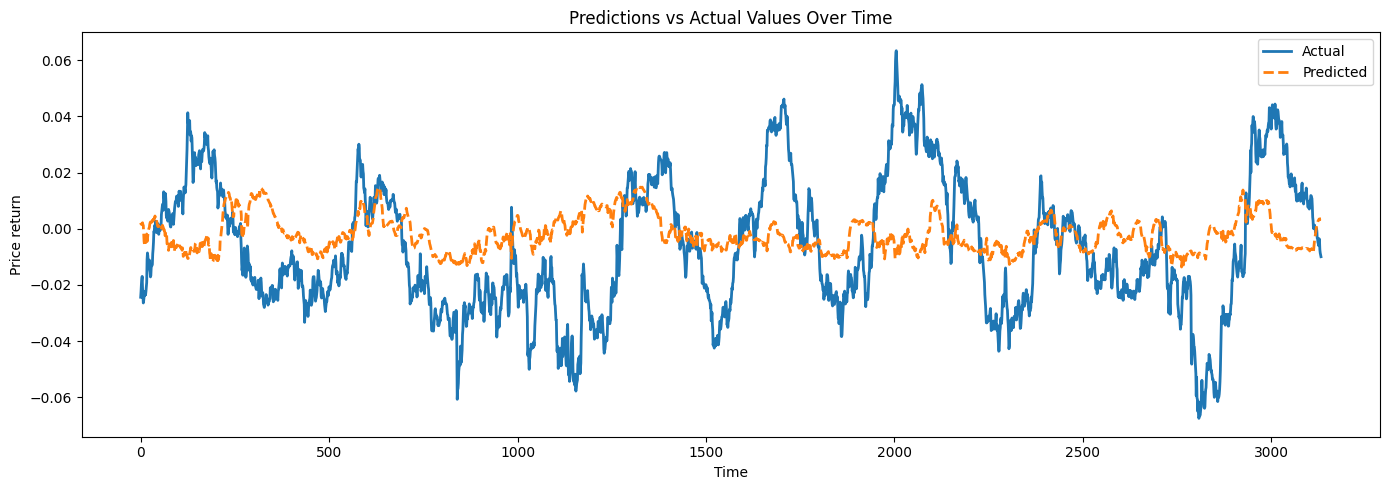

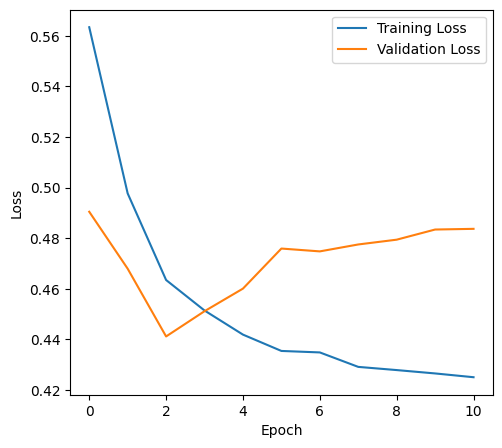

=== Cross-validation (validation folds) ===
mean CV MSE: 0.000613283016718924
mean CV MAE: 0.01993231102824211
mean CV DA: 0.4656673114119923
mean CV SR: -0.05115673843633071
mean CV R^2: -0.17153580188751222
mean CV Pearson correlation: -0.043891213834285736


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


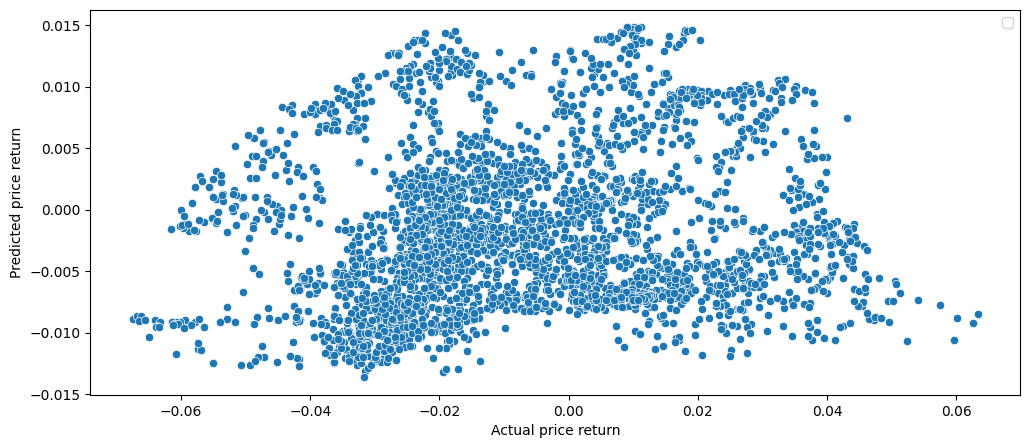

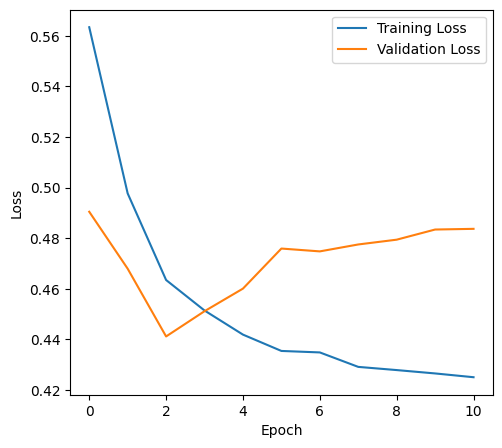

successfully saved training's output to lstm_sol_scores_final_3_1.json


In [11]:
lstm_3_scores, lstm_3_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_sol_scores_final_3_1.json", dropout=0.7, num_neurons=48, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.7287 - val_loss: 0.3990 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6408 - val_loss: 0.4160 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6242 - val_loss: 0.3840 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6171 - val_loss: 0.4240 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6072 - val_loss: 0.4387 - learning_rate: 0.0020
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5847 - val_loss: 0.4498 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5857 - val_loss: 0.4419 - learning_rate: 0.0010
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5953 - val_loss: 0.4679 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5817 - val_loss: 0.4645 - learning_rate: 5.0000e-04
Ep

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


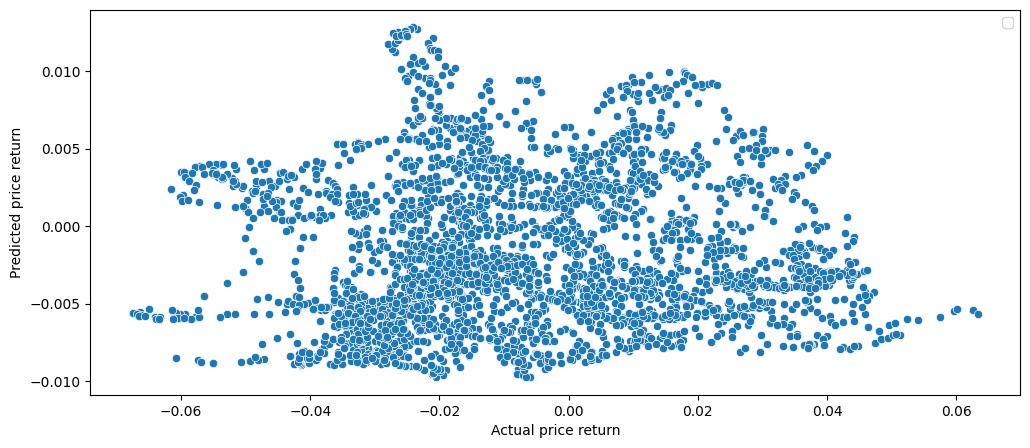

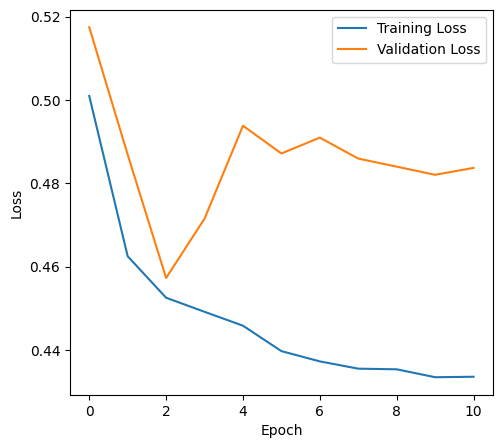

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0005849780282005668
mean CV MAE: 0.019332924857735634
mean CV DA: 0.5063829787234042
mean CV SR: 0.04178441412706073
mean CV R^2: -0.1061251401901245
mean CV Pearson correlation: 0.012574084103107452


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


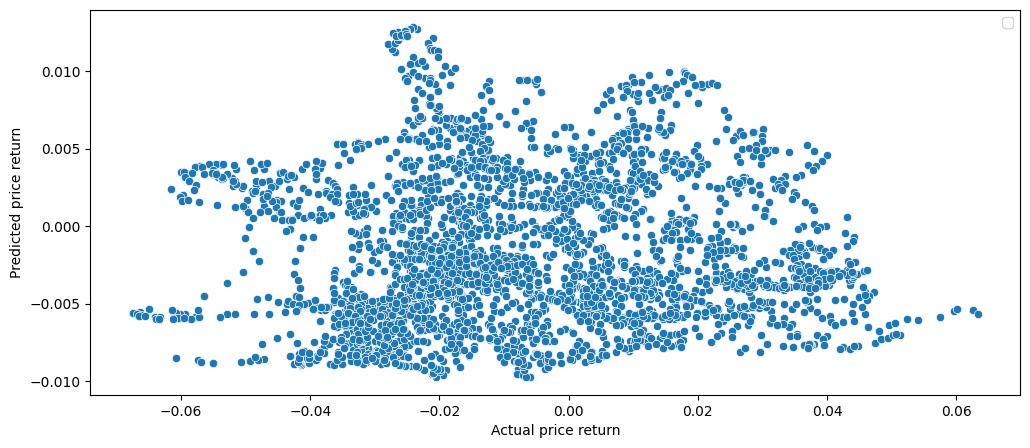

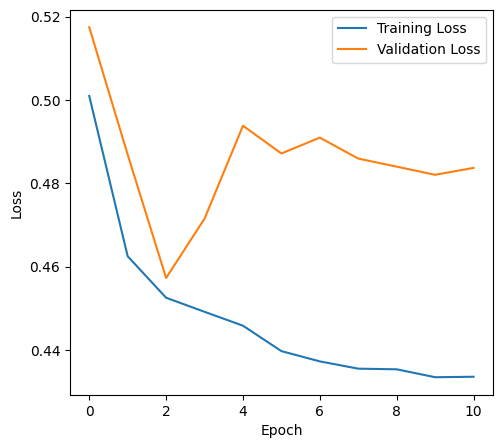

successfully saved training's output to lstm_sol_scores_final_4_1.json


In [ ]:
lstm_4_scores, lstm_4_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_sol_scores_final_4_1.json", dropout=0.7, num_neurons=24, num_layers=2, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.7969 - val_loss: 0.4018 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6142 - val_loss: 0.4358 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5745 - val_loss: 0.4456 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5690 - val_loss: 0.4588 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5431 - val_loss: 0.4720 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5353 - val_loss: 0.4690 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5436 - val_loss: 0.4661 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5462 - val_loss: 0.4691 - learning_rate: 2.5000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5278 - val_loss: 0.4758 - learning_rate: 2.500

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


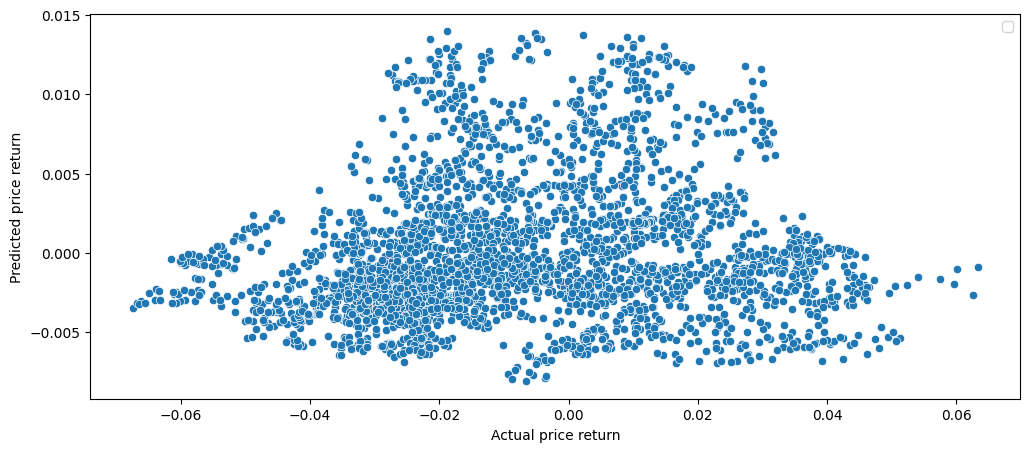

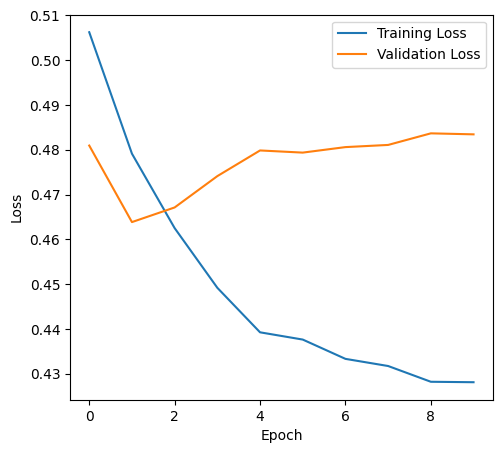

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0005926240119151771
mean CV MAE: 0.01979101076722145
mean CV DA: 0.5147969052224372
mean CV SR: 0.11192859788193332
mean CV R^2: -0.1251234769821167
mean CV Pearson correlation: 0.04615506902337074


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


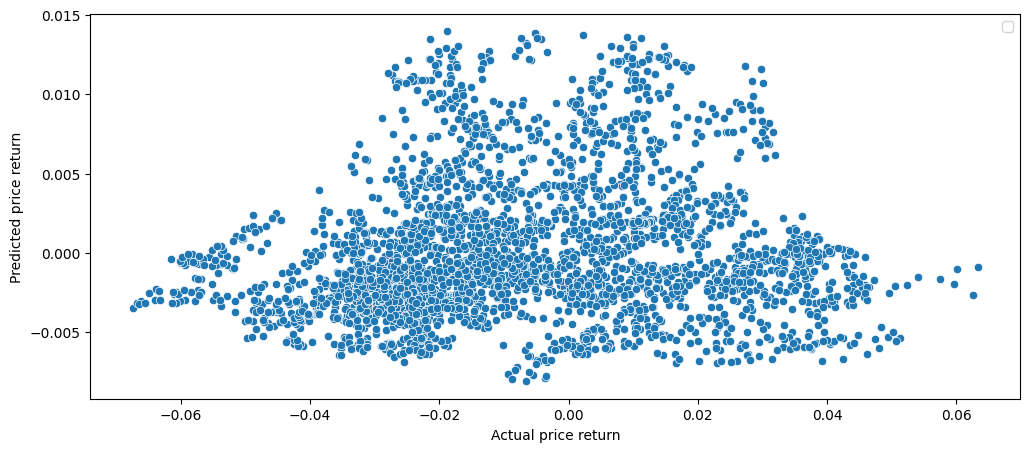

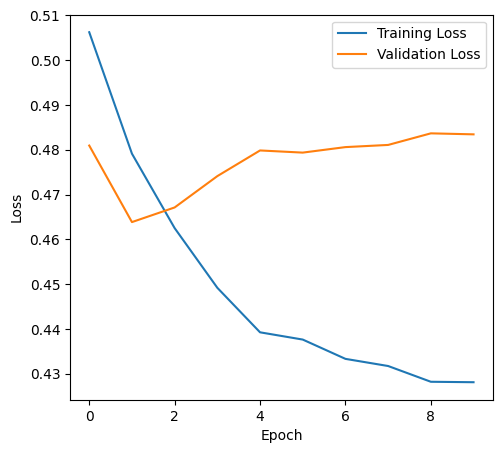

successfully saved training's output to lstm_sol_scores_final_5_1.json


In [ ]:
lstm_5_scores, lstm_5_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_sol_scores_final_5_1.json", dropout=0.7, num_neurons=24, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# GRU - trenowanie

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.7061 - val_loss: 0.3787 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.6160 - val_loss: 0.4053 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.6100 - val_loss: 0.4444 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.5946 - val_loss: 0.4512 - learning_rate: 5.0000e-04
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6061 - val_loss: 0.4517 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5858 - val_loss: 0.4439 - learning_rate: 2.5000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.5997 - val_loss: 0.4465 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6020 - val_loss: 0.4553 - learning_rate: 1.2500e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5861 - val_loss: 0.4611 - learning_rat

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


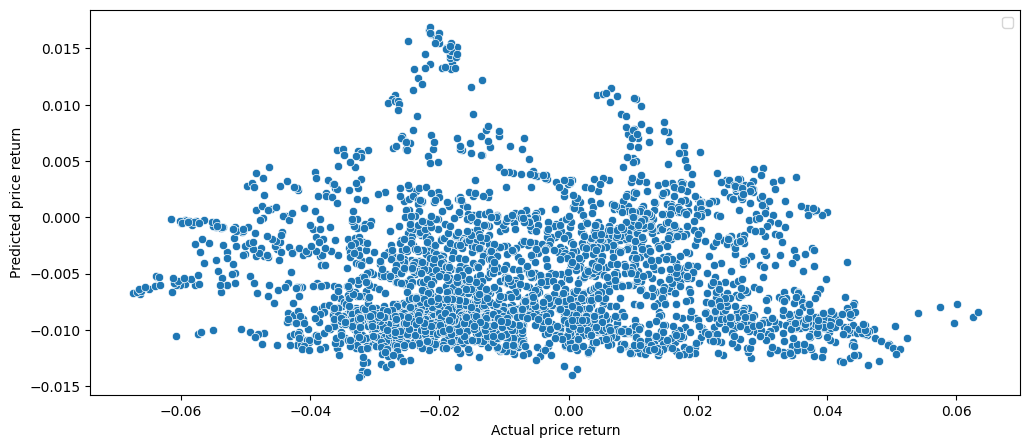

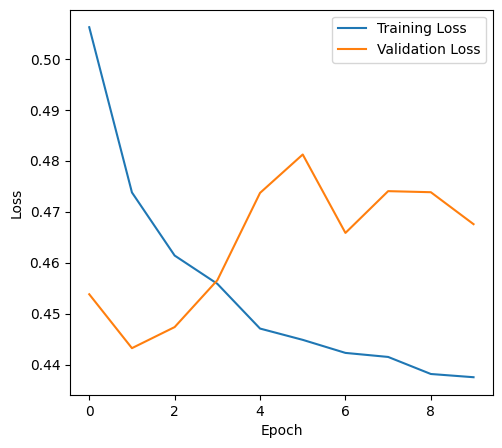

=== Cross-validation (validation folds) ===
mean CV MSE: 0.000597457168623805
mean CV MAE: 0.019716542214155197
mean CV DA: 0.5002901353965183
mean CV SR: 0.0369610208850667
mean CV R^2: -0.14815266132354737
mean CV Pearson correlation: 0.03707478195428848


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


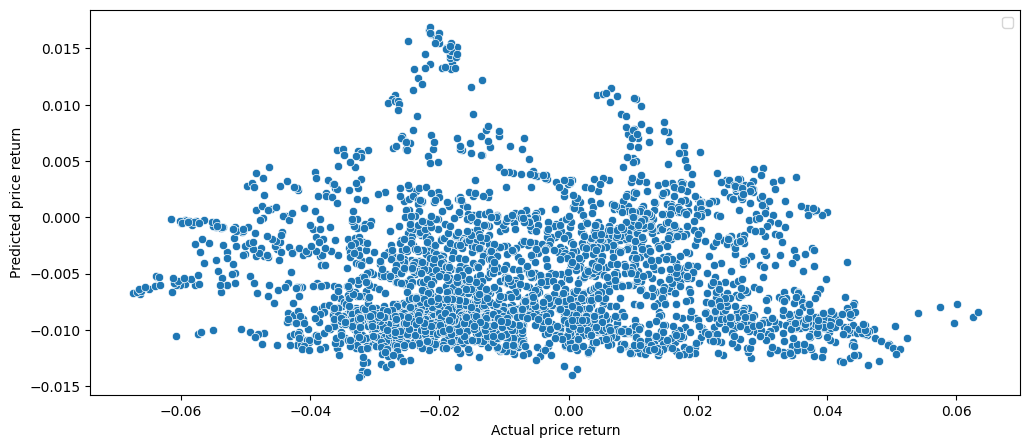

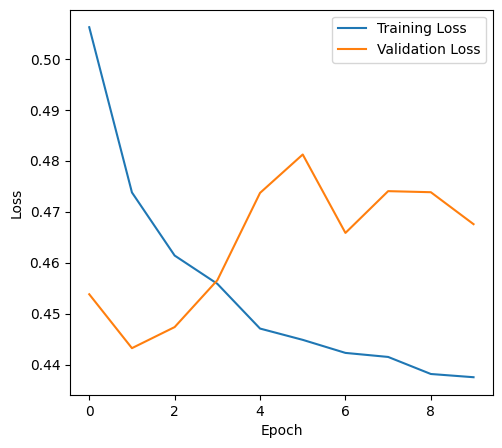

successfully saved training's output to gru_sol_scores_1_1_final.json


In [ ]:
gru_1_scores, gru_1_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_sol_scores_1_1_final.json", dropout=0.7, num_neurons=32, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.7425 - val_loss: 0.3797 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6558 - val_loss: 0.3910 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6028 - val_loss: 0.3932 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5964 - val_loss: 0.4050 - learning_rate: 5.0000e-04
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5834 - val_loss: 0.4023 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5509 - val_loss: 0.4021 - learning_rate: 2.5000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5710 - val_loss: 0.4030 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5868 - val_loss: 0.4032 - learning_rate: 1.2500e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5562 - val_loss: 0.4071 - learning_rat

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


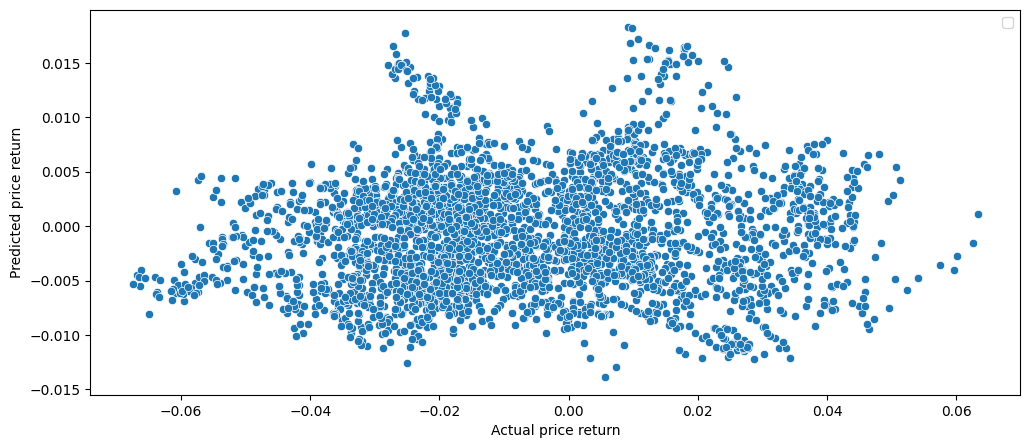

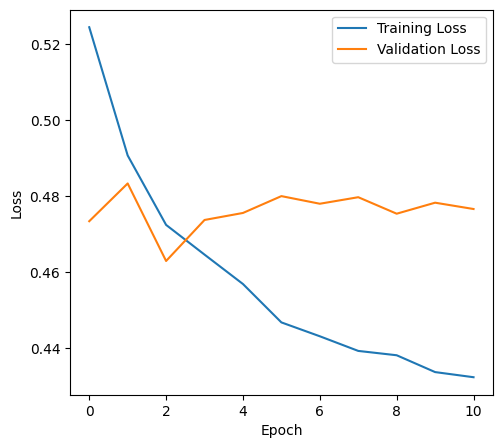

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0005967492470517755
mean CV MAE: 0.019798237830400467
mean CV DA: 0.48897485493230175
mean CV SR: 0.02616530618890059
mean CV R^2: -0.14125776290893555
mean CV Pearson correlation: 0.03493434190750122


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


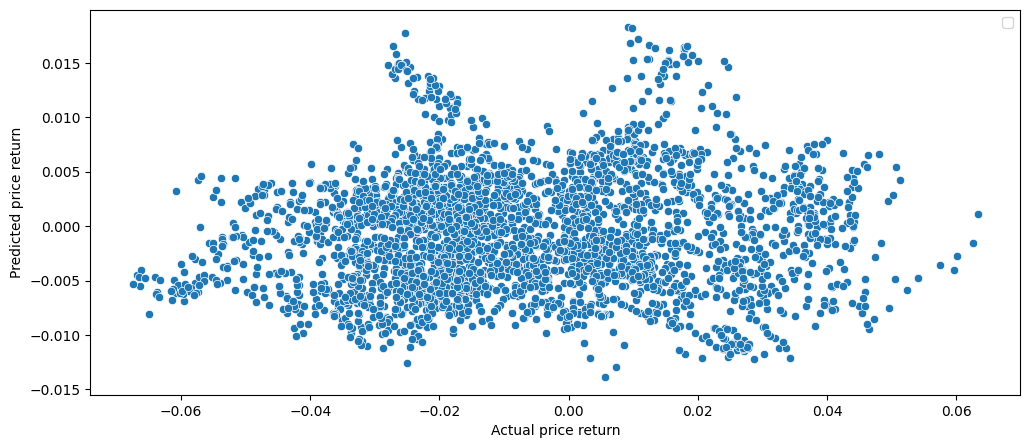

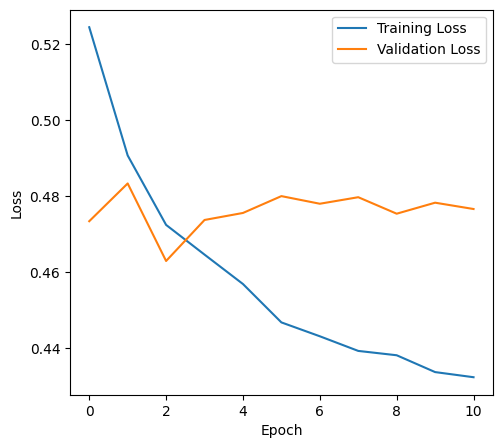

successfully saved training's output to gru_sol_scores_final_2_1.json


In [ ]:
gru_2_scores, gru_2_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_sol_scores_final_2_1.json", dropout=0.7, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.8908 - val_loss: 0.3960 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6862 - val_loss: 0.3951 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6185 - val_loss: 0.4146 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6044 - val_loss: 0.4451 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.5740 - val_loss: 0.4291 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.5620 - val_loss: 0.4260 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.5447 - val_loss: 0.4352 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.5626 - val_loss: 0.4299 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5330 - val_loss: 0.4383 - learning_rate: 2.5000e-0

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_66
Received: inputs=['Tensor(shape=(500, 64, 20))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_66
Received: inputs=['Tensor(shape=(50, 64, 20))']
  warnings.warn(msg)
/content/drive/My Drive/magisterka/model_training/price_model_training.py:414: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


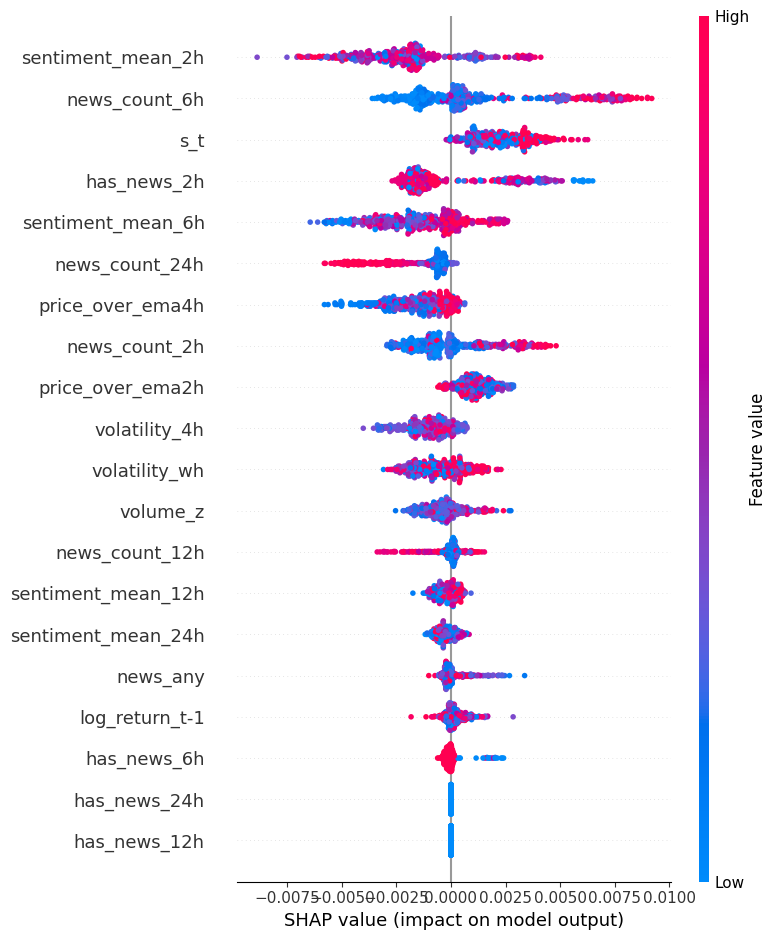

[FINAL TEST] mse: 0.000589383 | mae: 0.0200937 | da: 0.597 | sr: 0.184 | r_squared: -0.060 | corr: 0.169


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


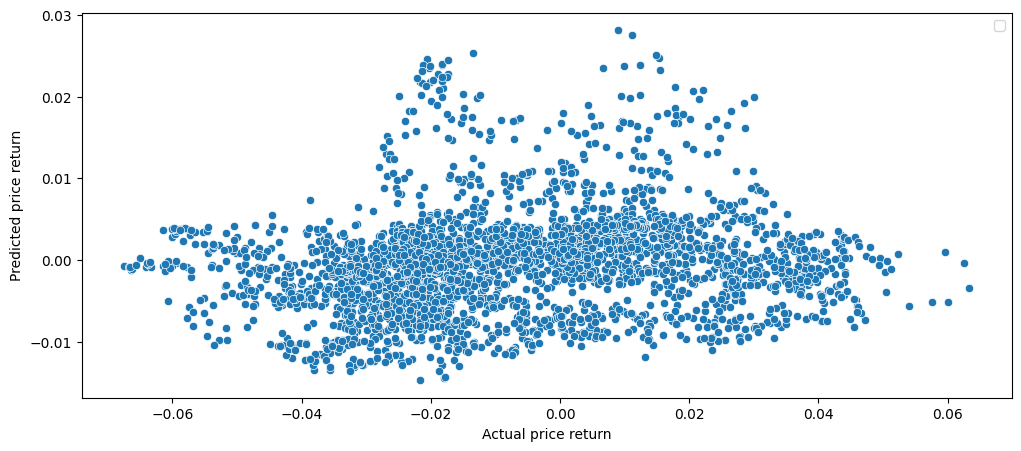

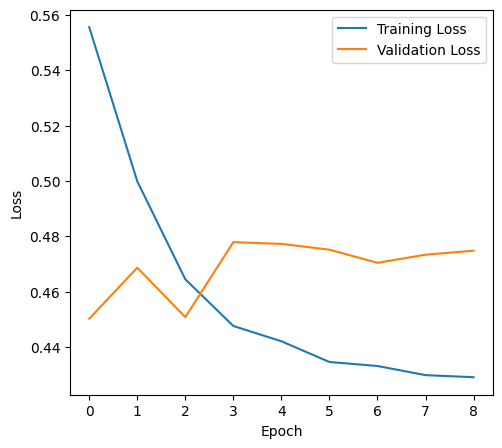

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0006027682102285326
mean CV MAE: 0.019854668527841568
mean CV DA: 0.4884912959381045
mean CV SR: 0.011664526244436244
mean CV R^2: -0.15462758541107177
mean CV Pearson correlation: 1.4829635802016128e-05


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


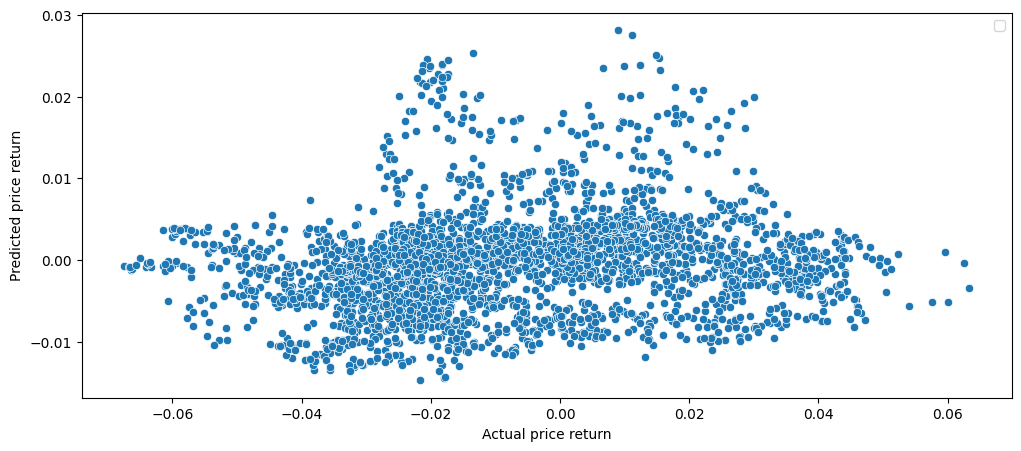

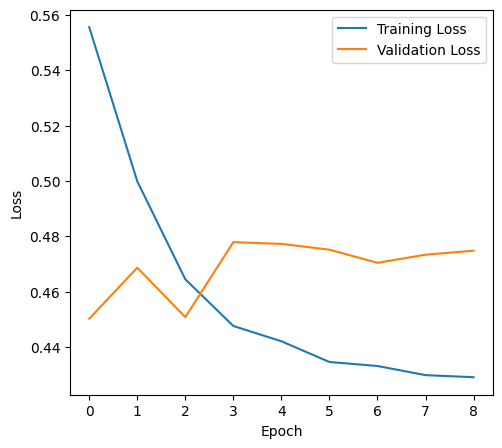

successfully saved training's output to gru_sol_scores_final_3_1.json


In [ ]:
gru_3_scores, gru_3_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_sol_scores_final_3_1.json", dropout=0.7, num_neurons=48, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER, plot_shap_values=True)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.0680 - val_loss: 0.5589 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7690 - val_loss: 0.4643 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6146 - val_loss: 0.5340 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6276 - val_loss: 0.6032 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5084 - val_loss: 0.5587 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5322 - val_loss: 0.5520 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4844 - val_loss: 0.5680 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4904 - val_loss: 0.5599 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4731 - val_loss: 0.5787 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


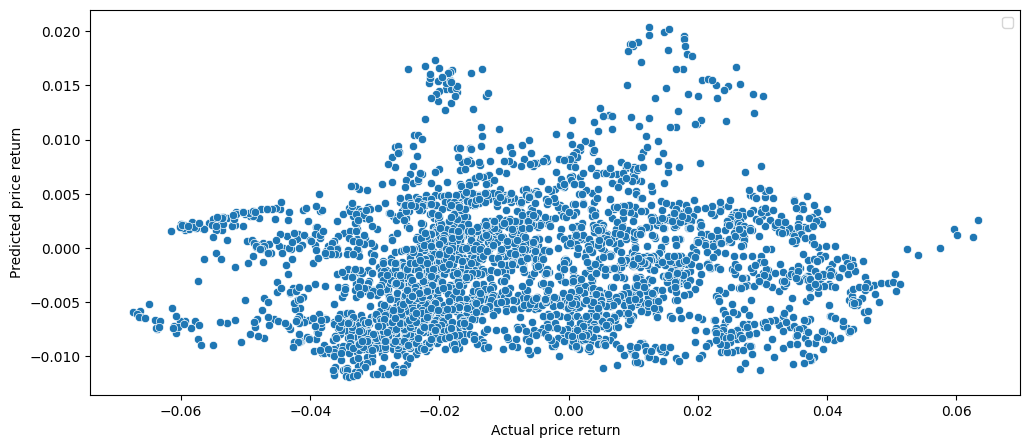

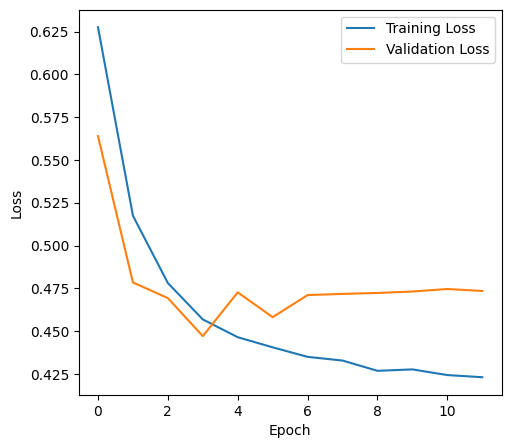

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0006625803071074188
mean CV MAE: 0.02071632258594036
mean CV DA: 0.44400386847195356
mean CV SR: -0.07972056422896494
mean CV R^2: -0.26556131839752195
mean CV Pearson correlation: -0.0948113203048706


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


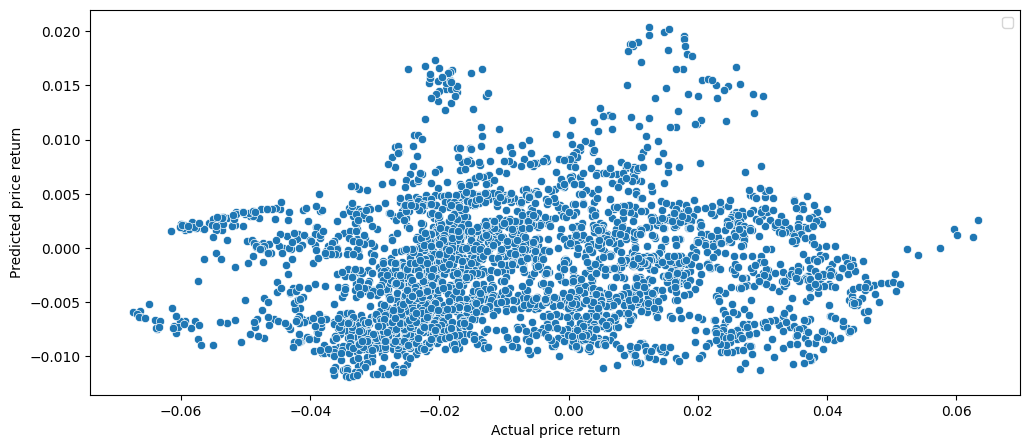

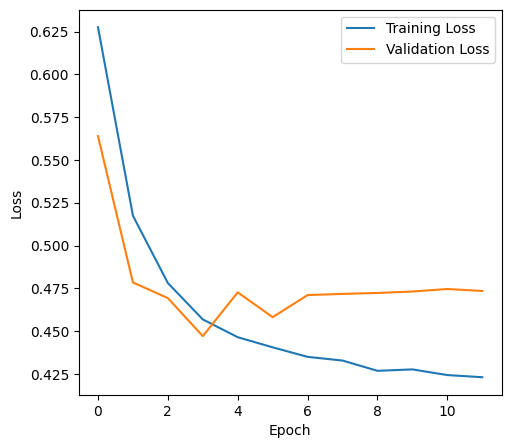

successfully saved training's output to gru_sol_scores_final_4_1.json


In [ ]:
gru_4_scores, gru_4_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_sol_scores_final_4_1.json", dropout=0.5, num_neurons=64, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# ARIMA - trenowanie

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
def adf_test(series):
    result = adfuller(series, autolag="AIC")
    return {
        "ADF statistic": result[0],
        "p-value": result[1],
        "used lags": result[2],
        "nobs": result[3]
    }
def kpss_test(series, regression="c"):
    statistic, p_value, n_lags, _ = kpss(series, regression=regression, nlags="auto")
    return {
        "KPSS statistic": statistic,
        "p-value": p_value,
        "used lags": n_lags
    }

In [ ]:
adf_test(y)

{'ADF statistic': np.float64(-8.603210730172115),
 'p-value': np.float64(6.780656661416732e-14),
 'used lags': 21,
 'nobs': 15961}

In [ ]:
kpss_test(y)

/tmp/ipython-input-1810698995.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, _ = kpss(series, regression=regression, nlags="auto")


{'KPSS statistic': np.float64(0.8154399298846969),
 'p-value': np.float64(0.01),
 'used lags': 74}

In [ ]:
d = 0

In [ ]:
def select_pq(y, d, p_max=5, q_max=5):
    best = {"aic": np.inf, "order": None, "result": None}
    for p in range(p_max + 1):
        for q in range(q_max + 1):
            try:
                res = SARIMAX(
                    y, order=(p, d, q),
                    enforce_stationarity=False,
                    enforce_invertibility=False
                ).fit(disp=False)
                if res.aic < best["aic"]:
                    best = {"aic": res.aic, "order": (p, d, q), "result": res}
            except Exception:
                pass
    return best["order"], best["aic"]

order, aic = select_pq(y, d=0, p_max=5, q_max=5)
order, aic

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self.

((3, 0, 0), np.float64(-143579.09966984816))

In [ ]:
y_acf = y[::12*12]

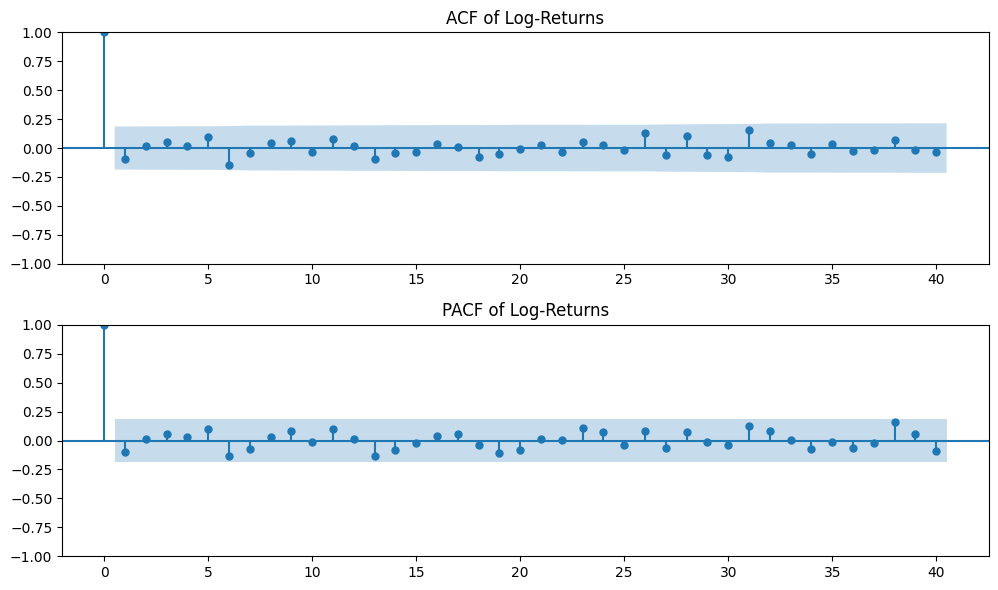

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

plot_acf(y_acf, lags=40, ax=ax[0])
ax[0].set_title("ACF of Log-Returns")

plot_pacf(y_acf, lags=40, ax=ax[1])
ax[1].set_title("PACF of Log-Returns")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[CV fold 1] mse: 0.000635099 | mae: 0.0213067 | da: 0.481 | sr: 0.001


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 2] mse: 0.000357692 | mae: 0.0136512 | da: 0.649 | sr: 0.251


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 3] mse: 0.000874672 | mae: 0.0213505 | da: 0.491 | sr: -0.196


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[CV fold 4] mse: 0.000936794 | mae: 0.0253067 | da: 0.437 | sr: -0.088


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 5] mse: 0.00292574 | mae: 0.0485189 | da: 0.383 | sr: -0.203


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[FINAL TEST] mse: 0.000609474 | mae: 0.020147 | da: 0.630 | sr: 0.324 | r_squared: -0.110 | corr: 0.078


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


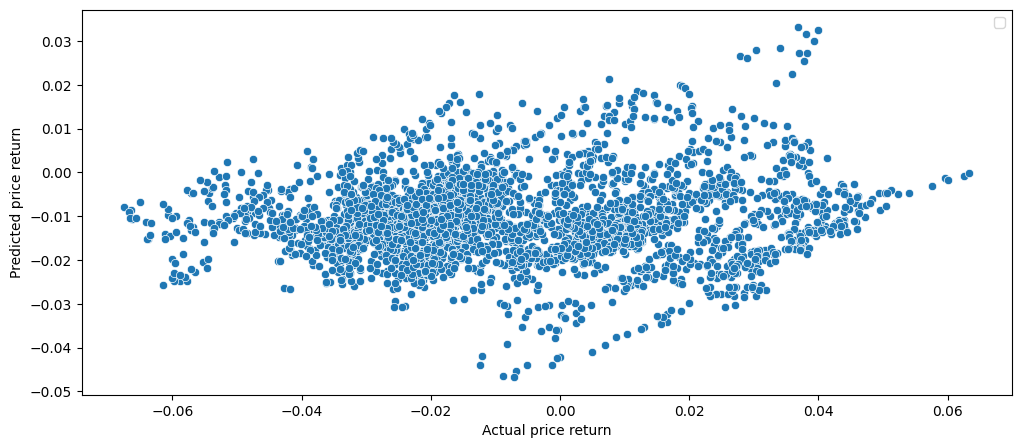

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0011459992031745687
mean CV MAE: 0.02602680114397401
mean CV DA: 0.4882214922571563
mean CV SR: -0.047214446906787125
mean CV R^2: -1.1367083119349795
mean CV Pearson correlation: 0.061382895337721524


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


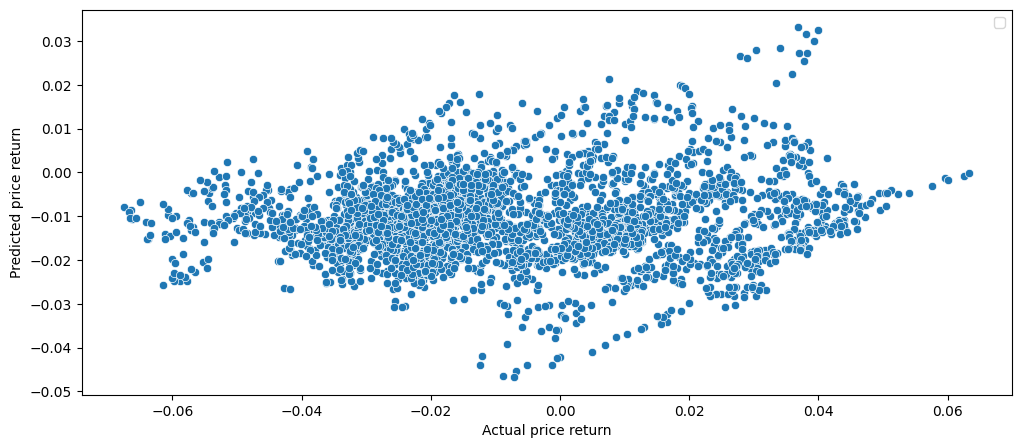

successfully saved training's output to arima_sol_scores_1_1_final.json


In [ ]:
arima_scores, arima_history = train_price_prediction_model(X, y, ModelType.ARIMA, split, "arima_sol_scores_1_1_final.json", epochs=100)